In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def ignore_warn(*args, **kwargs):
    pass
import warnings
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

## Load Data

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
print("The train data size  : {} ".format(train.shape))
print("The test data size : {} ".format(test.shape))

The train data size  : (1460, 81) 
The test data size : (1459, 80) 


In [5]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [6]:
print("The train data size  : {} ".format(train.shape))
print("The test data size : {} ".format(test.shape))

The train data size  : (1460, 80) 
The test data size : (1459, 79) 


## Outliers

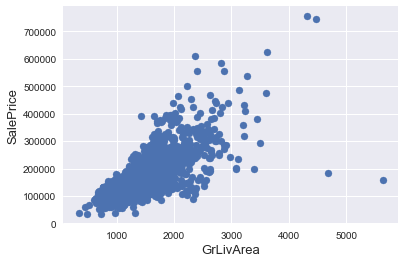

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

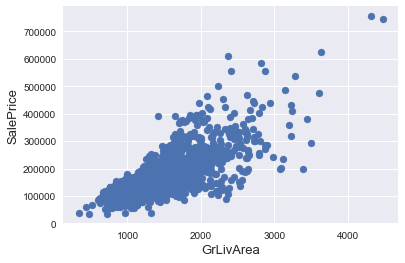

In [8]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 종속변수 SalePrice

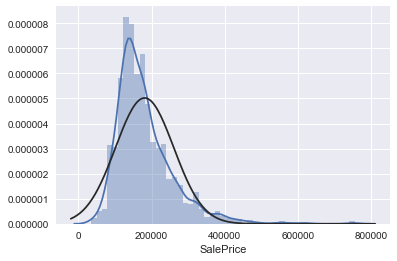

In [9]:
sns.distplot(train['SalePrice'] , fit=norm)

In [10]:
mu, sigma = norm.fit(train['SalePrice'])
print( '    평균 = {:.2f} \n 표준편차 = {:.2f}\n'.format(mu, sigma))

    평균 = 180932.92 
 표준편차 = 79467.79



##### QQ plot

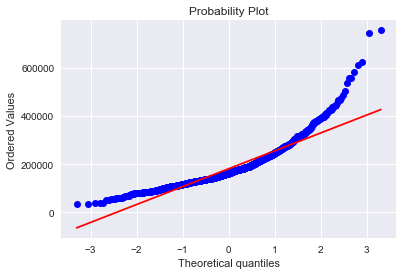

In [11]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

##### log 변환

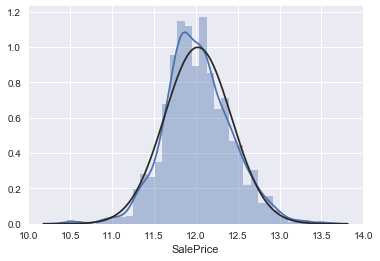

In [12]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'] , fit=norm)

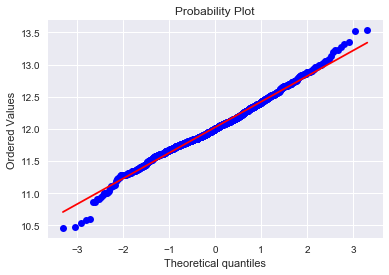

In [13]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## Features engineering

In [14]:
num_train = train.shape[0]
num_test = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [15]:
y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

##### null 확인

In [16]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageQual', 'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Electrical', 'BsmtUnfSF', 'Exterior1st',
       'Exterior2nd', 'TotalBsmtSF', 'GarageArea', 'GarageCars'],
      dtype='object')

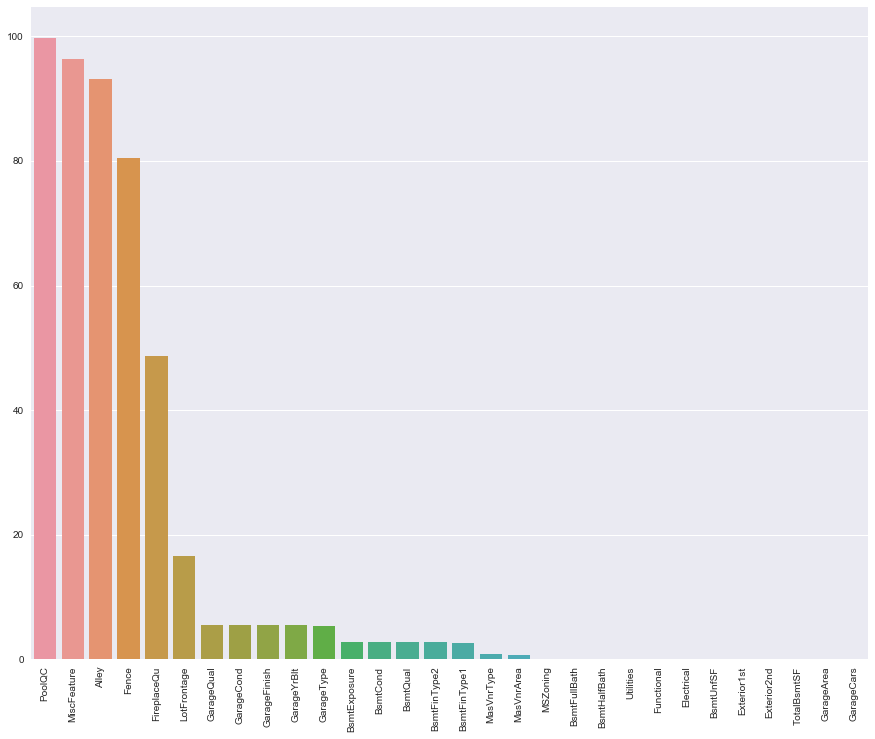

In [17]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90') #x축 라벨 세로로
sns.barplot(x=all_data_na.index, y=all_data_na)
all_data_na.index

In [18]:
def nullcheck(all_data):
    fill_none_feature = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',\
                     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', \
                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\
                     'MasVnrType']
    fill_zero_feature = ['GarageYrBlt', 'GarageArea', 'GarageCars',\
                         'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',\
                         "MasVnrArea",\
                        ]
    for idx in fill_none_feature:
        all_data[idx] = all_data[idx].fillna("None")
    for idx in fill_zero_feature:
        all_data[idx] = all_data[idx].fillna(0)
    all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')
    all_data["Functional"] = all_data["Functional"].fillna("Typ")
    all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')
    all_data['Exterior1st'] = all_data['Exterior1st'].fillna('VinylSd')
    all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('VinylSd')
    all_data['SaleType'] = all_data['SaleType'].fillna("WD")
    all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')
    all_data = all_data.drop(['Utilities'], axis=1)
    return all_data

In [19]:
all_data = nullcheck(all_data)

In [20]:
#남은 Null 값이 있는지 확인
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [21]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [22]:
tr_notnull = all_data.copy()

##### 숫자이지만 카테고리인 feature 카테고리화

In [23]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

##### 라벨인코딩 (y/n or grade)

In [24]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [25]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [26]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


In [27]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [28]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [29]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)


(2917, 220)


In [30]:
train = all_data[:num_train]
test = all_data[num_train:]

## modeling

In [32]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [33]:
def get_rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
    return rmse

##### Lasso

In [34]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

##### ElasticNet

In [35]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

##### KernelRidge

In [36]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

##### GradientBoostingRegressor

In [37]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

##### XGBoost

In [38]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

##### LightGBM

In [39]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [40]:
score = get_rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [41]:
score = get_rmse_cv(ENet)
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.1116 (0.0074)



In [42]:
score = get_rmse_cv(KRR)
print("\nKernelRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KernelRidge score: 0.1153 (0.0075)



In [43]:
score = get_rmse_cv(GBoost)
print("\nGradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GradientBoosting score: 0.1177 (0.0080)



In [44]:
score = get_rmse_cv(model_xgb)
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBoost score: 0.1157 (0.0063)



In [45]:
score = get_rmse_cv(model_lgb)
print("\nLightGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LightGBM score: 0.1162 (0.0071)



In [46]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [47]:
lasso.fit(train, y_train)
lasso_train_pred = lasso.predict(train)
lasso_pred = np.expm1(lasso.predict(test))
print(rmsle(y_train, lasso_train_pred))

0.10141501457132407


In [48]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = lasso_pred
sub.to_csv('../submission_lasso.csv',index=False)

In [49]:
# 0.12007

In [50]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))

0.07307464036005418


In [51]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = lgb_pred
sub.to_csv('../submission_lgb.csv',index=False)

In [52]:
# 0.12196

In [53]:
ENet.fit(train, y_train)
ENet_train_pred = ENet.predict(train)
ENet_pred = np.expm1(ENet.predict(test))
print(rmsle(y_train, ENet_train_pred))

0.10092254693385762


In [54]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ENet_pred
sub.to_csv('../submission_ENet.csv',index=False)

In [55]:
# 0.12012

In [56]:
KRR.fit(train, y_train)
KRR_train_pred = KRR.predict(train)
KRR_pred = np.expm1(KRR.predict(test))
print(rmsle(y_train, KRR_train_pred))

0.08417817343357802


In [57]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = KRR_pred
sub.to_csv('../submission_KRR.csv',index=False)

In [58]:
# 0.12102

In [59]:
GBoost.fit(train, y_train)
GBoost_train_pred = GBoost.predict(train)
GBoost_pred = np.expm1(GBoost.predict(test))
print(rmsle(y_train, GBoost_train_pred))

0.05196924387577057


In [60]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = GBoost_pred
sub.to_csv('../submission_GBoost.csv',index=False)

In [61]:
#0.11946

In [62]:
model_xgb.fit(train, y_train)
model_xgb_train_pred = model_xgb.predict(train)
model_xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, model_xgb_train_pred))

0.07872027124385908


In [63]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = model_xgb_pred
sub.to_csv('../submission_xgb.csv',index=False)

In [64]:
# 0.12260

In [65]:
model_lgb.fit(train, y_train)
model_lgb_train_pred = model_lgb.predict(train)
model_lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, model_lgb_train_pred))

0.07307464036005418


In [66]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = model_lgb_pred
sub.to_csv('../submission_lgb.csv',index=False)

In [67]:
# 0.12196

In [ ]:
tr_notnull

In [ ]:
heat= all_data.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)